In [2]:
import os
import copy
import multiprocessing as mp

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

from utils import *

In [3]:
plt.rc('font', family='NanumGothic')

In [4]:
df = pd.read_pickle('./20221111_df.pkl')

In [5]:
evt = get_event_date()

In [6]:
tokens = set(word_cnt_by(df))

In [13]:
t_train = []
y_train = []
for row in df.itertuples():
    t_train.append(row.title)
    y_train.append(row.recommendation)

x_train = []
with mp.Pool(processes=os.cpu_count()) as pool:
    for i in tqdm(pool.imap_unordered(word_counter, t_train, chunksize=1), total=len(t_train)):
        res = dict.fromkeys(tokens, 0)
        res.update(i)
        try:
            assert len(res) == len(tokens)
        except AssertionError:
            print(set(i) - tokens)
        x_train.append(list(res.values()))

  0%|          | 0/38463 [00:00<?, ?it/s]

In [14]:
y_train = np.array(y_train).reshape(-1, 1)

In [15]:
arr = np.array(x_train, dtype=np.int32)

In [16]:
print(arr.shape)
print(y_train.shape)

(38463, 54163)
(38463, 1)


In [17]:
m = np.concatenate([arr, y_train], axis=1)

In [18]:
corr = np.corrcoef(m.T)

In [19]:
corr[-1].shape

(54164,)

In [20]:
df_corr = pd.DataFrame([tokens, corr[-1]]).T

In [21]:
df_corr = df_corr.sort_values(by=1, ascending=False)

In [25]:
df_corr = df_corr.dropna()

In [28]:
df_corr.columns = ['word', 'corr']

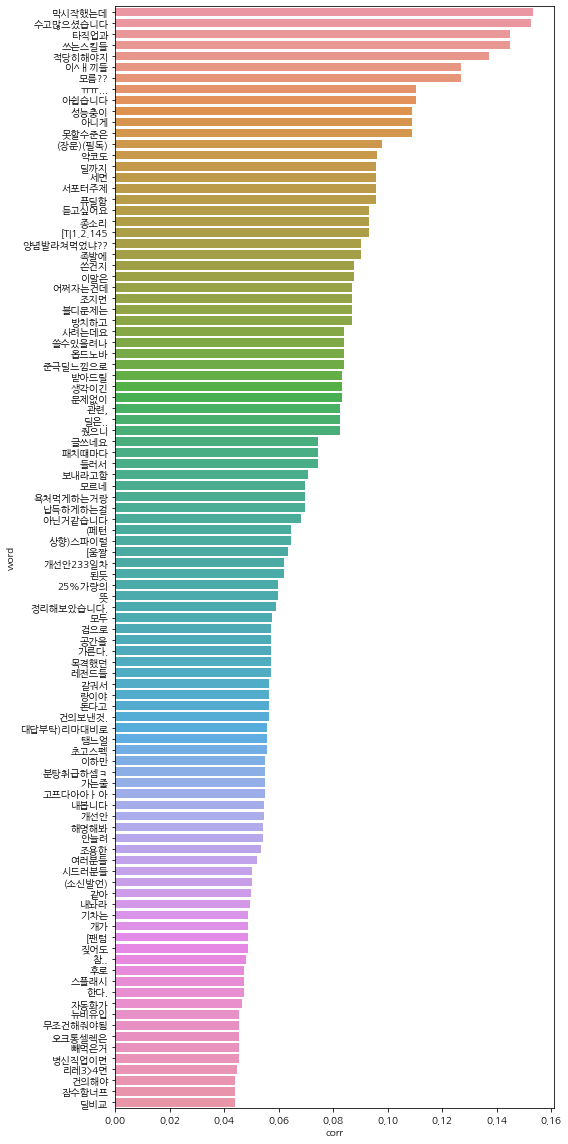

In [38]:
plt.figure(figsize=(8, 16))
sns.barplot(data=df_corr.head(100), y='word', x='corr', orient='h')
plt.tight_layout()
plt.savefig("reco_corr.svg")
plt.show()